# Introduction

Machine learning has established itself as a successful interdisciplinary field which seeks to find patterns in data. Throwing in quantum computing gives rise to interesting areas of research that aim to use the principles of quantum mechanics to augment machine learning, or vice-versa. On this page, we aim to give you a glimpse into the exciting and rapidly changing field of near-term quantum machine learning.

## Machine Learning (ML)

Before we dive into quantum machine learning, let's do a whirlwind overview of machine learning. For our purposes, machine learning can be split roughly into three subfields: supervised learning, unsupervised learning, and reinforcement learning.

### Supervised Learning

<img alt="supervised.png" src="./supervised.png" width="600"/>

Given tuples of labeled data $(x_i,y_i)$ , we aim to learn the function that maps $f:x \mapsto y$ and generalizes to unseen inputs. For example, given a set of labeled photos of cats or dogs, we want to identify new photos of cats or dogs.

### Unsupervised Learning

<img alt="unsupervised.png" src="./unsupervised.png" width="600"/>

Given a collection of unlabeled data $(x_i)$, we aim to learn some structure of the data; for example, grouping a set of viewers based on their movie viewing history in order to recommend new movies.

### Reinforcement Learning

<img alt="reinforcement.png" src="./reinforcement.png" width="600"/>

Given access to an environment that rewards us based on our actions, we aim to maximise our expected rewards; for example, algorithmically learning how to play PAC-MAN.

## Quantum Machine Learning (QML)

There are four different approaches to combining quantum computing and machine learning, differentiated by whether the data is classical (C) or quantum (Q), or whether the algorithm runs on a classical (C) or quantum (Q) computer. CC refers to processing Classical data using Classical computers, such as traditional machine learning models. CQ refers to processing Classical data using Quantum machine learning algorithms (this workshop is mostly about this). QC refers to processing Quantum data using Classical machine learning algorithms (what I have been doing as a computational solid state physicist). This is an active area of investigation, with classical machine learning algorithms used in many areas. QQ refers to processing Quantum data using Quantum machine learning algorithms. This is an interesting topic, but very much still in its infancy (watch for the advent of quantum memory).

In this context, a quantum dataset consists of observations from a natural or artificial quantum system, such as measurements of qubit interactions, while a classical dataset consists of observations from a classical system, such as time series, text, or images.

There are two distinct categories of QC algorithms: those that require quantum random access memory (qRAM) and those who don't. "Random access memory" (RAM) is data storage that can be read and changed in any order. Quantum RAM is analogous, but would also allow storing quantum states The various proposed qRAM-based QML algorithms, e.g. qPCA, qSVM and qClustering, boast exponential speedups compared to their classical algorithms, however there are currently no viable hardware candidates for realizing qRAM.

Recently, most of the focus of CQ approaches to machine learning has been on near-term algorithms that can be executed on the current quantum devices. Classical machine learning techniques have made great strides in the past decade, enabled in large part by the availability of sufficiently powerful hardware. Maybe the existence of quantum hardware might enable further advances in the field.

Note that this is a very dynamic area of current investigation by multiple research teams worldwide, and there are still many open questions, as well as confusing terminology and notation. We will try and be as consistent as possible in this course, but also point out when concepts have been referred to by different names, or how different concepts relate to each other.

# Parameterized quantum circuits

Parameterized quantum circuits, where the gates are defined through tunable parameters, are a fundamental building block of near-term quantum machine learning algorithms. In the literature, depending on the context, parameterized quantum circuits are also called parameterized trial states, variational forms, or ansatzes.

Here is an example of a simple parameterized circuit, with two parameterized gates, a single-qubit $z$-rotation gate, with a variable rotation $\theta$, followed by a two-qubit controlled $z$-rotation gate, with the same variable rotation $\theta$. 

We can create the parameterized circuit above using the `QuantumCircuit` and `Parameter` classes. The Parameter class lets us add rotation gates, without having to specify what the angles are yet: 

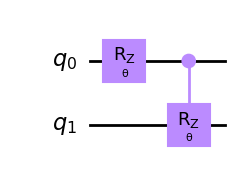

In [1]:
from qiskit.circuit import QuantumCircuit, Parameter
theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crz(theta, 0, 1)
qc.draw(output='mpl')

As all quantum gates used in a quantum circuit are unitary (A unitary operation is a reversible operation that preserves the norm (i.e. makes sure our probabilities always sum to 1)), a parameterized circuit itself can be described as a unitary operation on $n$ qubits, $U_\phi$, acting on some initial state $|\phi_0\rangle$, often set to $|0\rangle^{\otimes n}$. The resulting parameterized quantum state is $ |\psi_0\rangle=U_\theta|\phi_0\rangle$ where $\theta$ is a set of tunable parameters.


## Parameterized quantum circuit properties

How do we choose one parameterized circuit over the other? To use parameterized quantum circuits as a machine learning model, we need them to generalize well. This means that the circuit should be able to generate a significant subset of the states within the output Hilbert space (Hilbert space is what you get when you generalize the 3D space we're used to (called Euclidean space) to as many dimensions as you want. It’s named after David Hilbert.). To avoid being easy to simulate on a classical computer, the circuit should also entangle qubits.

A proposed metric for this purpose is called the expressibility and entangling capability to discriminate between different parameterized quantum circuits. We can think of the expressibility of a circuit as the extent to which it can generate states within the Hilbert space, while the entangling capability of a circuit describes its ability to generate entangled states.

### Expressibility

The expressibility of a parameterized quantum circuit is essentially the coverage of the Hilbert space by the circuit's hypothesis space. Highly expressive parameterized quantum circuits can represent many different unitaries. There are many ways to represent this expressibility. In the [original reference](https://arxiv.org/abs/1905.10876)  the authors quantify it by computing the extent to which the states generated from the circuit deviate from the uniform distribution (If the chance of producing any quantum state is equally probable, we say the states are uniformly distributed.)

Let's compare the two following single-qubit circuits to get a sense of what it means for a circuit to be expressible or not, by sampling 2000 output states for each circuit and plotting them on a Bloch sphere. 

<img alt="example1.png" src="./example1.png" width="1200"/>

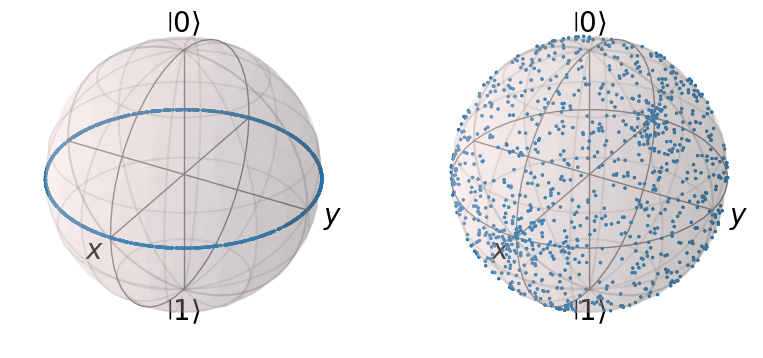

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# First, we need to define the circuits:
theta_param = Parameter('θ')
phi_param = Parameter('Φ')

# Circuit A
#### Code me
# Circuit B
#### Code me

# Next we uniformly sample the parameter space for the two parameters theta and phi
np.random.seed(0)
num_param = 1000
theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]

# Then we take the parameter value lists, build the state vectors corresponding
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]

# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):    
    state_1=Statevector.from_instruction(qc_A.bind_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc_B.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()

For Circuit A, we see output states distributed about the equator of the Bloch sphere. With Circuit B's additional parameterized $z$-rotation gate, we can cover all the Bloch sphere with output states, but the coverage is not uniform; there are concentrations of points on the $+X$ and $-X$ poles of the Bloch sphere.

Expressibility is a way to quantify what we just observed for these single-qubit circuits. Circuit A would have a low expressibility score due to the limited set of states it can explore, whereas Circuit B would have a high expressibility score. 

### Entangling capability

Entanglement is a key resource in quantum computing. The Meyer-Wallach measure (A measure of the average entanglement between qubits in the range 0 to 1.) is one of many metrics that measures how entangled a given state is. The Meyer-Wallach measure of an unentangled product state (Here, a product state is a state that can be written as the product of two separate kets, e.g. $|\psi\rangle = |a\rangle \otimes |b\rangle) is 0, while the Meyer-Wallach measure of a highly entangled state, such as the Bell state, is 1. The entangling capability of a parameterized quantum circuit can be defined as the average Meyer-Wallach measure for the states it can generate.

For example, consider the following multi-qubit parameterized circuits:

<img alt="example2.png" src="./example2.png" width="1200"/>

Circuit A has no entangling operations, that is, no two-qubit gates, so it has no entangling capability. Thus, this circuit would produce states that have Meyer-Wallach measures of 0, leading to an averaged value of 0. Circuit B has several two-qubit gates, so it can generate quantum states with some entanglement. Therefore, the average Meyer-Wallach measure would be greater than 0.

Using these two parameterized quantum circuit descriptors, expressibility and entangling capability, we can identify circuits that have limited capabilities. We expect that limited circuits are poor candidates for quantum machine learning applications. There is a strong correlation between classification accuracy and expressibility, and a weak correlation between classification accuracy entangling capability.


### Hardware efficiency

In this era of near term quantum computing, where devices have limited qubit connectivity (When building a real quantum computer, depending on how we build it, we might not be able to interact each qubit (e.g. through a CNOT gate) directly. If we can interact two qubits directly, we say they are connected), coherence times (This is the time it takes for a quantum system to stop being 'coherent' with itself, meaning we can't interfere it with itself any more) and gate fidelities, the depth of the circuits we run directly affects the accuracy of our results, since there is limited error correction or mitigation.

[This reference](https://arxiv.org/abs/1704.05018) introduces a class of hardware efficient parameterized circuits to accommodate device constraints. The common trait of these circuits is the use of a limited set of quantum gates as well as a particular qubit connection topology. The gate set usually consists of one two-qubit entangling gate and up to three single-qubit gates. The circuit is then constructed from blocks of single-qubit gates and entangling gates, which are applied to multiple or all qubits in parallel. One sequence of a single-qubit and an entangling block is called a layer, and the parameterized circuit generally has multiple layers.

Circuit B depicted in the 'Entangling Capability' section is an example of a single layer hardware efficient parameterized circuit.

## Parameterized quantum circuits for machine learning

In quantum machine learning, parameterized quantum circuits tend to be used for two things:
* To encode data, where the parameters are determined by the data being encoded
* As a quantum model, where the parameters are determined by an optimization process.

Here we will give some examples of how to build parameterized quantum circuits used in the quantum machine learning literature using Qiskit.

In [this reference](https://arxiv.org/abs/1804.11326), the authors introduce the following parameterized circuit, used to encode data, which we will study in detail later
$$ \begin{align*}\mathcal{U}_{\Phi(\mathbf{x})}=\prod_d U_{\Phi(\mathbf{x})}H^{\otimes n},\ U_{\Phi(\mathbf{x})}=\exp\left(i\sum_{S\subseteq[n]}\phi_S(\mathbf{x})\prod_{k\in S} P_i\right),\end{align*} $$

which contains layers of Hadamard gates interleaved with entangling blocks, $U_{\Phi(\mathbf{x})}$. This unitary was chosen because it is classically difficult to compute, but tractable on near term hardware. Within the entangling blocks, $U_{\Phi(\mathbf{x})}:P_i \in \{ I, X, Y, Z \}$ denotes the Pauli matrices, the index $S$ describes connectivity between different qubits: $S \in \{\binom{n}{k}\ \text{combinations},\ k = 1,... n \}$, and the data mapping function $\phi_S(\mathbf{x})$  is

$$
\begin{align*}\phi_S:\mathbf{x}\mapsto \Bigg\{\begin{array}{ll} x_i & \mbox{if}\ S=\{i\} \\ (\pi-x_i)(\pi-x_j) & \mbox{if}\ S=\{i,j\} \end{array}\end{align*}
$$

Specifically, they use $k=2$, $P_0=Z$,$P_1=ZZ$, which in Qiskit is the `ZZFeatureMap` circuit:



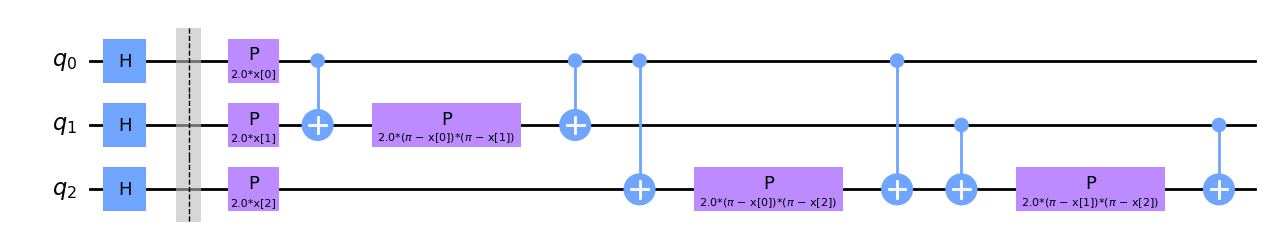

In [3]:
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.decompose().draw(output='mpl')

the authors also use a hardware efficient circuit as a quantum model, consisting of alternating layers of single-qubit rotation gates, followed by two-qubit gates. In particular, they use $y$-and-$z$-rotation gates, and controlled-$z$ gates, which we can build using the `TwoLocal` circuit:

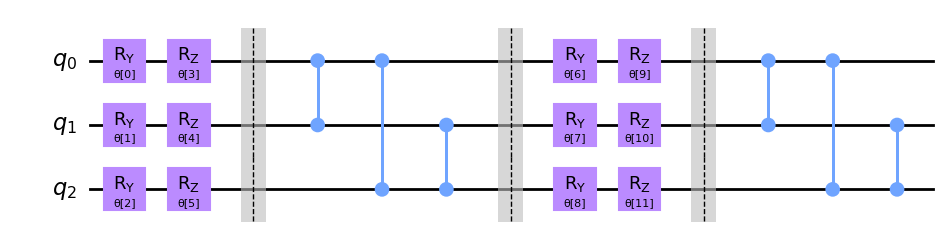

In [5]:
from qiskit.circuit.library import TwoLocal
qc_twolocal = TwoLocal(num_qubits=3, reps=2, rotation_blocks=['ry','rz'],
                entanglement_blocks='cz', skip_final_rotation_layer=True,
                insert_barriers=True)

qc_twolocal.decompose().draw(output='mpl')

# Data Encoding

Data representation is crucial for the success of machine learning models. For classical machine learning, the problem is how to represent the data numerically, so that it can be best processed by a classical machine learning algorithm.

For quantum machine learning, this question is similar, but more fundamental: how to represent and efficiently input the data into a quantum system, so that it can be processed by a quantum machine learning algorithm. This is usually referred to as data encoding, but is also called data embedding or loading.

This process is a critical part of quantum machine learning algorithms and directly affects their computational power.

## Methods

Let's consider a classical dataset $\mathscr{X}$ consisting of $M$ samples, each with $N$ features (A feature is a property of the things we're trying to learn about that we can assign a number to. If we were learning something about cats, the features might be "height" or "age" or "propensity to consume treats"): 

$$
\begin{align*}{\mathscr{X}} = {\{}x^{(1)},{\dots},{x^{(m)}},\dots,x^{(M)}{\}}\end{align*}
$$



where $ x^{(m)}$ is an $N$ dimensional vector for $m=1,\dots,M. To represent this dataset in a qubit system, we can use various embedding techniques, some of which are briefly explained and implemented below.



### Basis encoding

Basis encoding associates a classical $N$-bit string with a computational basis state (Also known as Z-basis states, these are the states we measure when we measure in the Z (or 'computational') basis. These are the states with labels like $|00\rangle$ and $|00110100\rangle$. IBM systems always measure in the Z-basis.) of a $N$-qubit system. For example, if $x=5$, this can be represented as a 4-bit string as $0101$, and by a 4-qubit system as the quantum state $|0101\rangle$. More generally, for an $N$-bit string: $x=(b_1,b_2,\dots,b_n)$ , the corresponding $n$-qubit state is $| x \rangle = | b_1, b_2, ... , b_N \rangle $ with $b_n \in {0,1}$ for $n=1,...,N$.

For the classical dataset $\mathscr{X}$  described above, to use basis encoding, each data point must be a $N$-bit string: $x^{(m)} = (b_1, b_2, ... , b_N)$, which then can be mapped directly to the quantum state $|x^{m}\rangle = |b_1, b_2, ... , b_N \rangle$  with $b_n \in \{0, 1 \} $ for $n=1,...,N$ and $m=1,...,M$ . We can represent the entire dataset as superpositions of computational basis states:

$$
\begin{align*} | \mathscr{X} \rangle = \frac{1}{\sqrt{M}}{\sum_{m=1}^{M}|x^{m} \rangle \end{align*}
$$

In Qiskit, once we calculate what state will encode our dataset, we can use the initialize function to prepare it. For example, the dataset $\mathscr{X} = \{x^{(1)}=101, x^{(2)}=111\}$ is encoded as the state : $|\mathscr{X}\rangle = \frac{1}{\sqrt{2}}(|101\rangle+|111\rangle)$

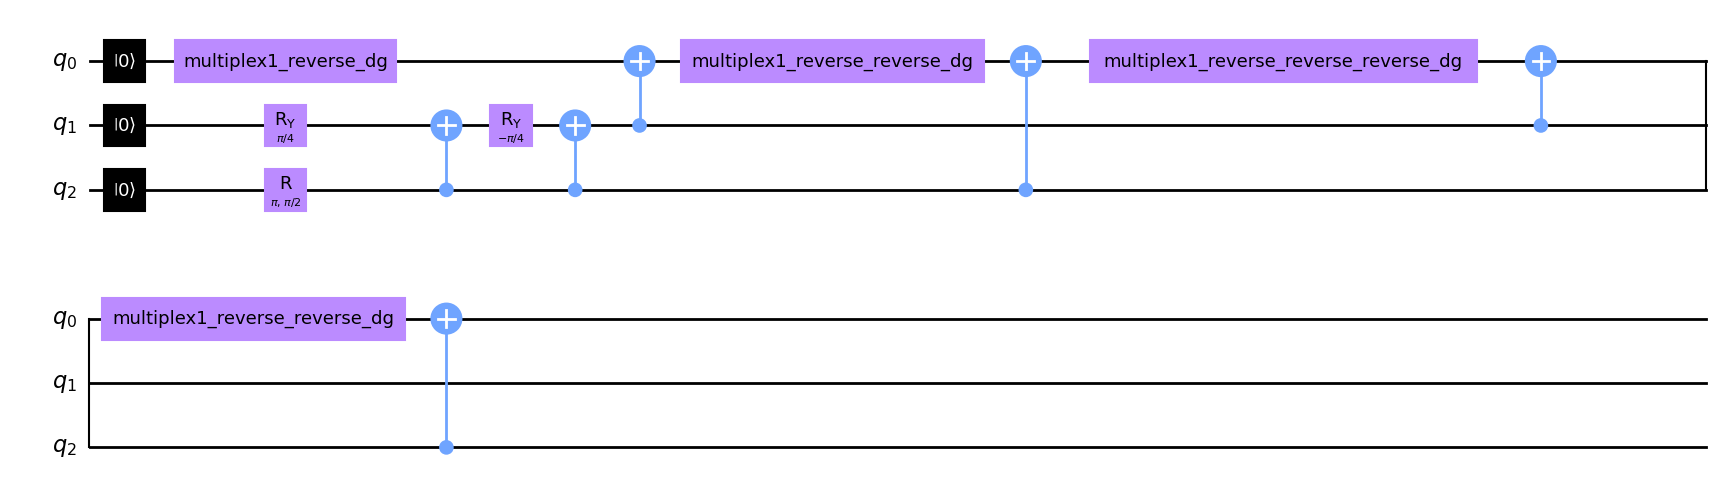

In [8]:
import math
from qiskit import QuantumCircuit

desired_state = [
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(2),
    0,
    1 / math.sqrt(2)]

qc = QuantumCircuit(3)
qc.initialize(desired_state, [0,1,2])
qc.decompose().decompose().decompose().decompose().decompose().draw(output='mpl')

This example illustrates a couple of disadvantages of basis encoding. While it is simple to understand, the state vectors can become quite sparse, and schemes to implement it are usually not efficient. 

### Amplitude encoding

Amplitude encoding encodes data into the amplitudes of a quantum state. It represents a normalised classical $N$-dimensional data point, $x$ , as the amplitudes of a $n$-qubit quantum state, $|\psi_x\rangle$:

$$
\begin{align*}|\psi_x\rangle = \sum_{i=1}^N x_i |i\rangle\end{align*}
$$

where $N=2^n$ , $x_i$ is the $i^{th}$ element of $x$ and $|i\rangle$ is the $i^{th}$ computational basis state.

To encode the classical dataset $\mathscr{X}$ described above, we concatenate all M $N$-dimensional data points into one amplitude vector, of length $N\times M$ :
$$
\begin{align*}\alpha=A_{\text{norm}}(x_{1}^{(1)},...,x_{N}^{(1)},...,x_{1}^{(m)},...,x_{N}^{(m)},...,x_{1}^{(M)},...,x_{N}^{(M)})\end{align*}
$$
where $A_{\text{norm}}$ is a normalisation constant, such that $|\alpha|^2 = 1$ . The dataset can now be represented in the computational basis as:
$\begin{align*}|\mathscr{X}\rangle = \sum_{i=1}^N \alpha_i |i\rangle\end{align*}$
where $\alpha_i$ are elements of the amplitude vector and are the computational basis states. The number of amplitudes to be encoded is $N\times M$. As a system of $n$ qubits provides $2^n$ amplitudes, amplitude embedding requires $n \ge \mathrm{log}_2(NM)$ qubits.

As an example, let's encode the dataset $\mathscr{X}= \{x^{(1)}=(1.5,0), x^{(2)}=(-2,3)\}$ using amplitude encoding. Concatenating both data points and normalizing the resulting vector, we get:
$$
\begin{align*}\alpha = \frac{1}{\sqrt{15.25}}(1.5,0,-2,3)\end{align*}
$$
and the resulting 2-qubit quantum state would be:
$$
\begin{align*}|\mathscr{X}\rangle = \frac{1}{\sqrt{15.25}}(1.5|00\rangle-2|10\rangle+3|11\rangle)\end{align*}
$$

In the example above, the total number of elements of the amplitude vector, $N\times M$, is a power of 2. When $N\times M$ is not a power of 2, we can simply choose a value for $n$ such that $2^n\geq MN$ and pad the amplitude vector with uninformative constants.

Like in basis encoding, once we calculate what state will encode our dataset, in Qiskit we can use the initialize function to prepare it:

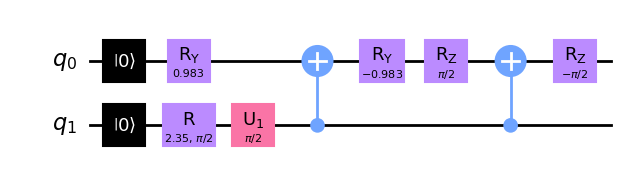

In [10]:
desired_state = [
    1 / math.sqrt(15.25) * 1.5,
    0,
    1 / math.sqrt(15.25) * -2,
    1 / math.sqrt(15.25) * 3]

qc = QuantumCircuit(2)
qc.initialize(desired_state, [0,1])

qc.decompose().decompose().decompose().decompose().decompose().draw(output='mpl')

The advantage of amplitude encoding is that it only requires $\mathrm{log}_2(NM)$ qubits to encode. However, subsequent algorithms must operate on the amplitudes of a quantum state, and methods to prepare and measure the quantum states tend not to be efficient. 

### Angle encoding

Angle encoding encodes $N$ features into the rotation angles of $n$ qubits, where $N \le n$. For example, the data point $x = (x_1,...,x_N)$ can be encoded as:
$$
\begin{align*}{|x\rangle} = {\bigotimes^N_{i=1}} \cos(x_i)|0\rangle + \sin(x_i)|1\rangle\end{align*}
$$
This is different from the previous two encoding methods, as it only encodes one data point at a time, rather than a whole dataset. It does, however, only require N qubits or less and a constant depth quantum circuit, making it amenable to current quantum hardware.

We can specify angle encoding as a unitary (A unitary operation is a reversible operation that preserves the norm (i.e. makes sure our probabilities always sum to 1)):
$$
\begin{align*} S_{x_j} = {\bigotimes_{i=1}^N} U(x_j^{(i)}) \end{align*}
$$

where:
$$
\begin{align*}U(x_j^{(i)}) = \begin{bmatrix} \cos(x_j^{(i)}) & -\sin(x_j^{(i)}) \\ \sin(x_j^{(i)}) & \cos(x_j^{(i)}) \\ \end{bmatrix}\end{align*}
$$

Remembering that a single-qubit rotation around the $Y$-axis is:
$$
\begin{align*}U(x_j^{(i)}) = \begin{bmatrix} \cos(x_j^{(i)}) & -\sin(x_j^{(i)}) \\ \sin(x_j^{(i)}) & \cos(x_j^{(i)}) \\ \end{bmatrix}\end{align*}
$$
We note that $U(x_j^{(i)}) = RY(2x_j^{(i)})$, and as an example, encode the data point using Qiskit:

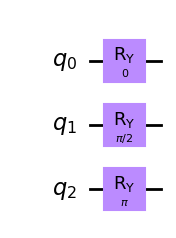

In [11]:
qc = QuantumCircuit(3)
qc.ry(0, 0)
qc.ry(2*math.pi/4, 1)
qc.ry(2*math.pi/2, 2)
qc.draw(output='mpl')

Dense angle encoding is a slight generalization of angle encoding, that encodes two features per qubit using the relative phase, where the data point $x = (x_1,...,x_N)$ can be encoded as:
$$
\begin{align*}|x\rangle = {\bigotimes_{i=1}^{N/2}} \cos(x_{2i-1})|0\rangle + e^{i x_{2i}}\sin(x_{2i-1})|1\rangle\end{align*}
$$
Although the angle and dense angle encoding use sinusoids and exponentials, there is nothing special about these functions. We can easily abstract these to a general class of qubit encodings that use arbitrary functions, or define the encodings as arbitrary unitaries, implemented as parameterized quantum circuits.

### Arbitrary encoding

Arbitrary encoding encodes $N$ features as rotations on $N$ parameterized gates on $n$ qubits, where $n\leq N$ . Like angle encoding, it only encodes one data point at a time, rather than a whole dataset. It also uses a constant depth quantum circuit and $n\leq N$ qubits, meaning it can be run on current quantum hardware.

For example, to use the Qiskit `EfficientSU2` circuit to encode 12 features, would only use 3 qubits:

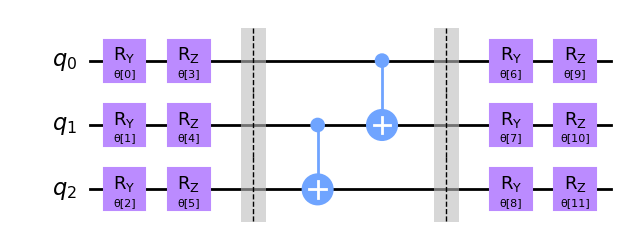

In [12]:
from qiskit.circuit.library import EfficientSU2
circuit = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)
circuit.decompose().draw(output='mpl')

Here we encode the data point with 12 features, $x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]$ using each of the parameterized gates to encode a different feature.

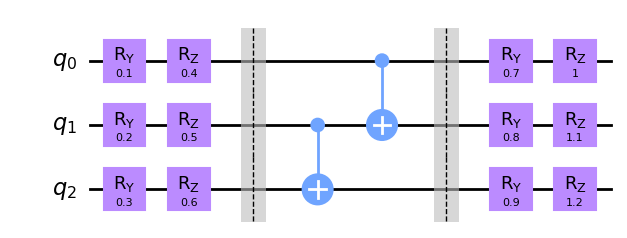

In [13]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
encode = circuit.bind_parameters(x)
encode.decompose().draw(output='mpl')

The Qiskit `ZZFeatureMap` circuit with 3 qubits, only encodes a data point of 3 features, despite having 6 parameterized gates:

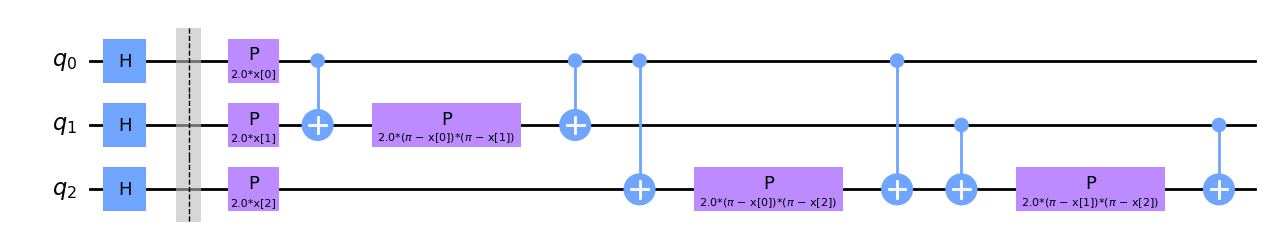

In [14]:
from qiskit.circuit.library import ZZFeatureMap
circuit = ZZFeatureMap(3, reps=1, insert_barriers=True)
circuit.decompose().draw(output='mpl')

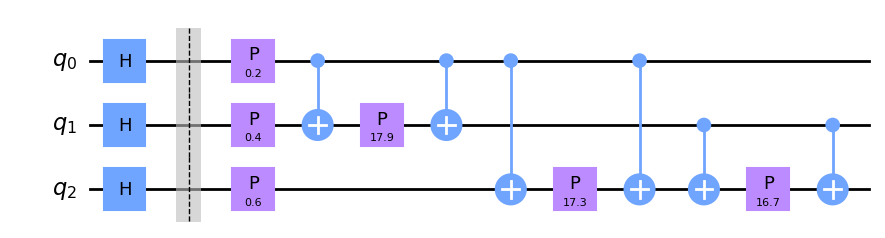

In [15]:
x = [0.1, 0.2, 0.3]
encode = circuit.bind_parameters(x)
encode.decompose().draw(output='mpl')

# The new Qiskit 

Notice that you'll need latest development version of the `qiskit_machine_learning` to proceed. Please follow the instructions [here](https://qiskit.org/ecosystem/machine-learning/getting_started.html#installation) to install the library from source in your Conda environment. This will also install a newer version of Qiskit where the new `primitives`, in combination with the `quantum_info` module, have superseded functionality of opflow. Thus, the latter is being deprecated.

## Primitives

[Primitives](https://qiskit.org/ecosystem/ibm-runtime/primitives.html) are core functions that make it easier to build modular algorithms and applications.

The initial release of Qiskit Runtime includes two primitives:

**Sampler**: Generates quasi-probability distribution from input circuits.

**Estimator**: Calculates expectation values from input circuits and observables.

## Using the Estimator primitive

Similar to the `Backend` base class, there is an `Estimator` base class defined in Qiskit Terra that standardizes the way users interact with all `Estimator` implementations. This allows users to easily change their choice of simulator or device for performing expectation value calculations, even if the underlying implementation is different.

In this section we will be using the default implementation in Qiskit Terra, which uses a local state vector simulator.

### 1. Create a circuit

For a basic expectation value calculation you will need at least one quantum circuit to prepare our system in a precise quantum state for study. Here, `Decompose` is a "shallow" unroller, it unrolls every instruction one level down (so that you end up with a more readable circuit).  


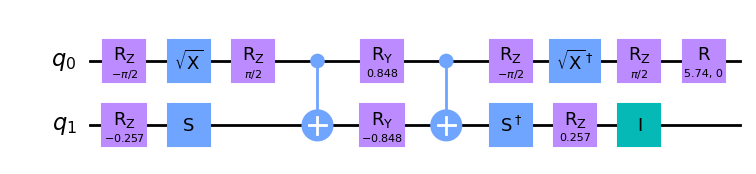

In [2]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 2, seed=0).decompose(reps=1)
display(circuit.draw("mpl"))

### 2. Create an observable to measure

You will also need at least one observable to measure. Observables represent physical properties of a quantum system (such as energy or spin), and allow said properties to be measured (such as their expectation values) for a given state of our system. For simplicity, you can use the SparsePauliOp class in Qiskit to define them. 

In [3]:
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp("XZ")
print(f">>> Observable: {observable.paulis}")

>>> Observable: ['XZ']


### 3. Initialize an Estimator class

The next step is to create an instance of an `Estimator` class, which can be any of the subclasses that comply with the base specification. For simplicity, we will use Qiskit Terra's  `qiskit.primitives.Estimator` class, based on the [Statevector construct](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html?highlight=statevector#qiskit.quantum_info.Statevector) (algebraic simulation).

In [4]:
from qiskit.primitives import Estimator

estimator = Estimator()

### 4. Invoke the Estimator and get results

To calculate the expectation values, invoke the `run()` method of the `Estimator` instance you just created and pass in the circuit and observable as input parameters. This method call is asynchronous, and you will get a `Job` object back. You can use this object to query for information like `job_id()` and `status()`  

In [5]:
job = estimator.run(circuit, observable)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: f934565a-5c70-4da8-b32f-9173b06c10fb
>>> Job Status: JobStatus.RUNNING


The `result()` method of the job will return the `EstimatorResult`, which includes both the expectation values and job metadata.

In [6]:
result = job.result()
print(f">>> {result}")
print(f"  > Expectation value: {result.values[0]}")

>>> EstimatorResult(values=array([0.50006466]), metadata=[{}])
  > Expectation value: 0.5000646622430736


### Do it yourself

Create a random circuit to prepare a state, create an observable, invoke `run()` method to  get expectation value

In [ ]:
### Code me

### Do it yourself

The `RealAmplitudes` circuit is a heuristic trial wave function used as Ansatz in chemistry applications or classification circuits in machine learning. The circuit consists of alternating layers of $Y$ rotations and $CX$ entanglements. The entanglement pattern can be user-defined or selected from a predefined set (hence it is parametric). It is called `RealAmplitudes` since the prepared quantum states will only have real amplitudes, the complex part is always 0.

Use this parametrized circuit and an observable


In [ ]:
from qiskit.circuit.library import RealAmplitudes

circuit = RealAmplitudes(num_qubits=2, reps=2).decompose(reps=1)
observable = ## code me 
parameter_values = []## code me 

job = ## code me
result = job.result()

display(circuit.draw("mpl"))
print(f">>> Observable: {observable.paulis}")
print(f">>> Parameter values: {parameter_values}")
print(f">>> Expectation value: {result.values[0]}")

# Quantum Neural Networks


## 1. Introduction

### 1.1. Quantum vs. Classical Neural Networks

Classical neural networks are algorithmic models inspired by the human brain that can be trained to recognize patterns in data and learn to solve complex problems. They are based on a series of interconnected nodes, or *neurons*, organized in a layered structure, with parameters that can be learned by applying machine or deep learning training strategies.

The motivation behind quantum machine learning (QML) is to integrate notions from quantum computing and classical machine learning to open the way for new and improved learning schemes. QNNs apply this generic principle by combining classical neural networks and parametrized quantum circuits. Because they lie at an intersection between two fields, QNNs can be viewed from two perspectives:

- From a **machine learning perspective**, QNNs are, once again, algorithmic models that can be trained to find hidden patterns in data in a similar manner to their classical counterparts. These models can **load** classical data (**inputs**) into a quantum state, and later **process** it with quantum gates parametrized by **trainable weights**. Figure 1 shows a generic QNN example including the data loading and processing steps. The output from measuring this state can then be plugged into a loss function to train the weights through backpropagation.

- From a **quantum computing perspective**, QNNs are quantum algorithms based on parametrized quantum circuits that can be trained in a variational manner using classical optimizers. These circuits contain a **feature map** (with input parameters) and an **ansatz** (with trainable weights), as seen in Figure 1.

![new_qnn-3.jpg](new_qnn-3.jpg)


*Figure 1. Generic quantum neural network (QNN) structure.*
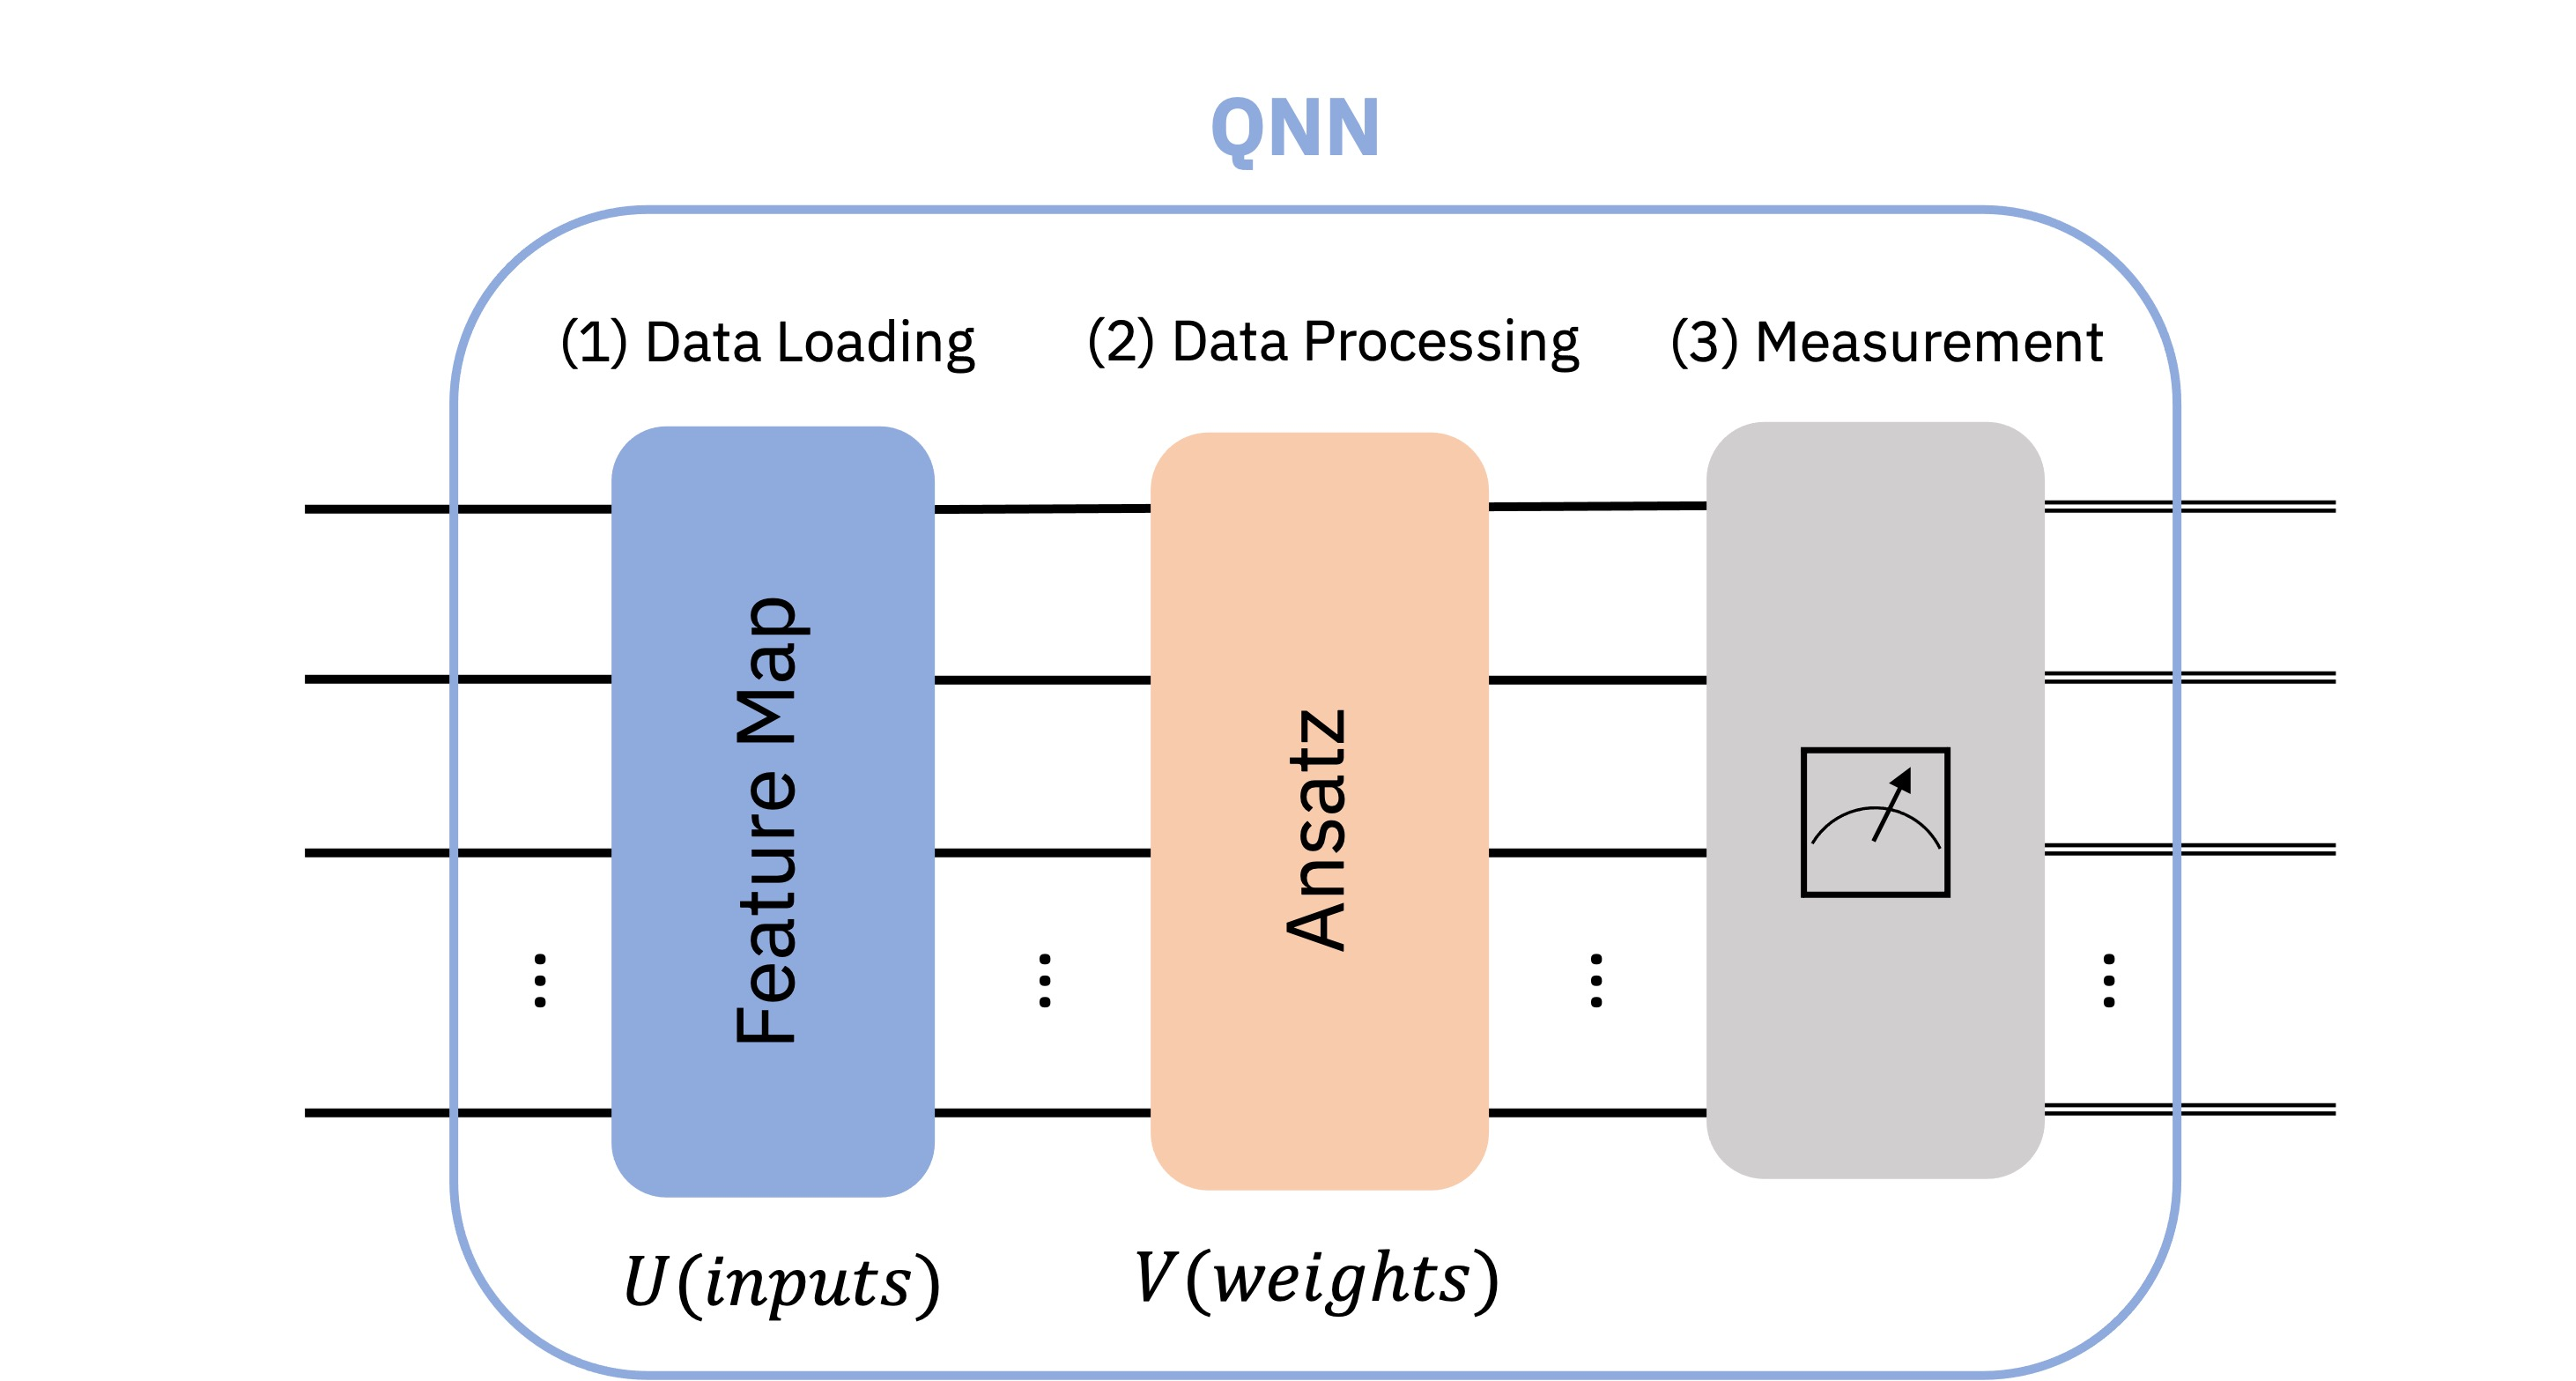

As you can see, these two perspectives are complementary, and do not necessarily rely on strict definitions of concepts such as "quantum neuron" or what constitutes a QNN's "layer".

### 1.2. Implementation in `qiskit-machine-learning`

The QNNs in `qiskit-machine-learning` are meant as application-agnostic computational units that can be used for different use cases, and their setup will depend on the application they are needed for. The module contains an interface for the QNNs and two specific implementations:

1. [NeuralNetwork](https://qiskit.org/ecosystem/machine-learning/stubs/qiskit_machine_learning.neural_networks.NeuralNetwork.html): The interface for neural networks. This is an abstract class all QNNs inherit from.
2. [EstimatorQNN](https://qiskit.org/ecosystem/machine-learning/stubs/qiskit_machine_learning.neural_networks.EstimatorQNN.html): A network based on the evaluation of quantum mechanical observables.
3. [SamplerQNN](https://qiskit.org/ecosystem/machine-learning/locale/fr_FR/stubs/qiskit_machine_learning.neural_networks.SamplerQNN.html): A network based on the samples resulting from measuring a quantum circuit.


These implementations are based on the [qiskit primitives](https://qiskit.org/documentation/apidoc/primitives.html). The primitives are the entry point to run QNNs on either a simulator or real quantum hardware. Each implementation, `EstimatorQNN` and `SamplerQNN`, takes in an optional instance of its corresponding primitive, which can be any subclass of `BaseEstimator` and `BaseSampler`, respectively.


The `NeuralNetwork` class is the interface for all QNNs available in `qiskit-machine-learning`.
It exposes a forward and a backward pass that take data samples and trainable weights as input.

It's important to note that `NeuralNetwork`s are "stateless". They do not contain any training capabilities (these are pushed to the actual algorithms or applications: [classifiers](https://qiskit.org/ecosystem/machine-learning/apidocs/qiskit_machine_learning.algorithms.html#classifiers), [regressors](https://qiskit.org/ecosystem/machine-learning/apidocs/qiskit_machine_learning.algorithms.html#regressors), etc), nor do they store the values for trainable weights.

***

Let's now look into specific examples for the two `NeuralNetwork` implementations. But first, let's set the algorithmic seed to ensure that the results don't change between runs.

In [7]:
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 42

## 2. How to Instantiate QNNs

### 2.1. `EstimatorQNN`

The `EstimatorQNN` takes in a parametrized quantum circuit as input, as well as an optional quantum mechanical observable, and outputs expectation value computations for the forward pass. The `EstimatorQNN` also accepts lists of observables to construct more complex QNNs.

Let's see an `EstimatorQNN` in action with a simple example. We start by constructing the parametrized circuit. This quantum circuit has two parameters, one represents a QNN input and the other represents a trainable weight:

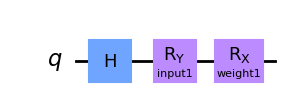

In [8]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

params1 = [Parameter("input1"), Parameter("weight1")]
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.ry(params1[0], 0)
qc1.rx(params1[1], 0)
qc1.draw("mpl")

We can now create an observable to define the expectation value computation. If not set, then the `EstimatorQNN` will automatically create the default observable $Z^{\otimes n}$. Here, $n$ is the number of qubits of the quantum circuit.

In this example, we will change things up and use the $Y^{\otimes n}$ observable:

In [9]:
from qiskit.quantum_info import SparsePauliOp

observable1 = SparsePauliOp.from_list([("Y" * qc1.num_qubits, 1)])

Together with the quantum circuit defined above, and the observable we have created, the `EstimatorQNN` constructor takes in the following keyword arguments:

- `estimator`: optional primitive instance
- `input_params`: list of quantum circuit parameters that should be treated as "network inputs"
- `weight_params`: list of quantum circuit parameters that should be treated as "network weights"

In this example, we previously decided that the first parameter of `params1` should be the input, while the second should be the weight. As we are performing a local statevector simulation, we will not set the `estimator` parameter; the network will create an instance of the reference `Estimator` primitive for us. If we needed to access cloud resources or `Aer` simulators, we would have to define the respective `Estimator` instances and pass them to the `EstimatorQNN`.

In [10]:
from qiskit_machine_learning.neural_networks import EstimatorQNN

estimator_qnn = EstimatorQNN(
    circuit=qc1, observables=observable1, input_params=[params1[0]], weight_params=[params1[1]]
)
estimator_qnn

We'll see how to use the QNN in the following sections, but before that, let's check out the `SamplerQNN` class.

### 2.2. `SamplerQNN`

The `SamplerQNN` is instantiated in a similar way to the `EstimatorQNN`, but because it directly consumes samples from measuring the quantum circuit, it does not require a custom observable.

These output samples are interpreted by default as the probabilities of measuring the integer index corresponding to a bitstring. However, the `SamplerQNN` also allows us to specify an `interpret` function to post-process the samples. This function should be defined so that it takes a measured integer (from a bitstring) and maps it to a new value, i.e. non-negative integer.

**(!)** It's important to note that if a custom `interpret` function is defined, the `output_shape` cannot be inferred by the network, and **needs to be provided explicitly**.

**(!)** It's also important to keep in mind that if no `interpret` function is used, the dimension of the probability vector will scale exponentially with the number of qubits. With a custom `interpret` function, this scaling can change. If, for instance, an index is mapped to the parity of the corresponding bitstring, i.e., to 0 or 1, the result will be a probability vector of length 2 independently of the number of qubits.

Let's create a different quantum circuit for the `SamplerQNN`. In this case, we will have two input parameters and four trainable weights that parametrize a  two-local circuit.

input parameters: ['input[0]', 'input[1]']
weight parameters: ['weight[0]', 'weight[1]', 'weight[2]', 'weight[3]']


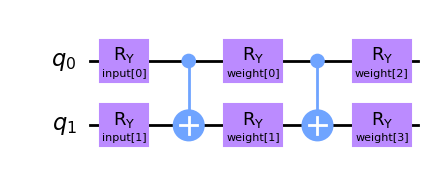

In [11]:
from qiskit.circuit import ParameterVector

inputs2 = ParameterVector("input", 2)
weights2 = ParameterVector("weight", 4)
print(f"input parameters: {[str(item) for item in inputs2.params]}")
print(f"weight parameters: {[str(item) for item in weights2.params]}")

qc2 = QuantumCircuit(2)
qc2.ry(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[0], 0)
qc2.ry(weights2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[2], 0)
qc2.ry(weights2[3], 1)

qc2.draw(output="mpl")

Similarly to the `EstimatorQNN`, we must specify inputs and weights when instantiating the `SamplerQNN`. In this case, the keyword arguments will be:
- `sampler`: optional primitive instance
- `input_params`: list of quantum circuit parameters that should be treated as "network inputs"
- `weight_params`: list of quantum circuit parameters that should be treated as "network weights"

Please note that, once again, we are choosing not to set the `Sampler` instance to the QNN and relying on the default.

In [12]:
from qiskit_machine_learning.neural_networks import SamplerQNN

sampler_qnn = SamplerQNN(circuit=qc2, input_params=inputs2, weight_params=weights2)
sampler_qnn

In addition to the basic arguments shown above, the `SamplerQNN` accepts three more settings: `input_gradients`, `interpret`, and `output_shape`. These will be introduced in sections 4 and 5.

## 3. How to Run a Forward Pass

The "forward pass" refers to calculation process, values of the output layers from the inputs data. It's traversing through all "neurons" from first to last layer. A loss function is calculated from the output values.



### 3.1. Set-Up
In a real setting, the inputs would be defined by the dataset, and the weights would be defined by the training algorithm or as part of a pre-trained model. However, for the sake of this tutorial, we will specify random sets of input and weights of the right dimension:

#### 3.1.1. `EstimatorQNN` Example

In [13]:
estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)

In [14]:
print(
    f"Number of input features for EstimatorQNN: {estimator_qnn.num_inputs} \nInput: {estimator_qnn_input}"
)
print(
    f"Number of trainable weights for EstimatorQNN: {estimator_qnn.num_weights} \nWeights: {estimator_qnn_weights}"
)

Number of input features for EstimatorQNN: 1 
Input: [0.77395605]
Number of trainable weights for EstimatorQNN: 1 
Weights: [0.43887844]


#### 3.1.2. `SamplerQNN` Example

In [15]:
sampler_qnn_input = algorithm_globals.random.random(sampler_qnn.num_inputs)
sampler_qnn_weights = algorithm_globals.random.random(sampler_qnn.num_weights)

In [16]:
print(
    f"Number of input features for SamplerQNN: {sampler_qnn.num_inputs} \nInput: {sampler_qnn_input}"
)
print(
    f"Number of trainable weights for SamplerQNN: {sampler_qnn.num_weights} \nWeights: {sampler_qnn_weights}"
)

Number of input features for SamplerQNN: 2 
Input: [0.85859792 0.69736803]
Number of trainable weights for SamplerQNN: 4 
Weights: [0.09417735 0.97562235 0.7611397  0.78606431]


Once we have the inputs and the weights, let's see the results for batched and non-batched passes.

### 3.2. Non-batched Forward Pass

#### 3.2.1. `EstimatorQNN` Example

For the `EstimatorQNN`, the expected output shape for the forward pass is `(1, num_qubits * num_observables)` where `1` in our case is the number of samples:

In [17]:
estimator_qnn_forward = estimator_qnn.forward(estimator_qnn_input, estimator_qnn_weights)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward}. \nShape: {estimator_qnn_forward.shape}"
)

Forward pass result for EstimatorQNN: [[0.2970094]]. 
Shape: (1, 1)


#### 3.2.2. `SamplerQNN` Example

For the `SamplerQNN` (without a custom interpret function), the expected output shape for the forward pass is `(1, 2**num_qubits)`. With a custom interpret function, the output shape will be `(1, output_shape)`, where `1` in our case is the number of samples:

In [18]:
sampler_qnn_forward = sampler_qnn.forward(sampler_qnn_input, sampler_qnn_weights)

print(
    f"Forward pass result for SamplerQNN: {sampler_qnn_forward}.  \nShape: {sampler_qnn_forward.shape}"
)

Forward pass result for SamplerQNN: [[0.01826527 0.25735654 0.5267981  0.19758009]].  
Shape: (1, 4)


### 3.3. Batched Forward Pass

#### 3.3.1. `EstimatorQNN` Example

For the `EstimatorQNN`, the expected output shape for the forward pass is `(batch_size, num_qubits * num_observables)`:

In [19]:
estimator_qnn_forward_batched = estimator_qnn.forward(
    [estimator_qnn_input, estimator_qnn_input], estimator_qnn_weights
)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward_batched}.  \nShape: {estimator_qnn_forward_batched.shape}"
)

Forward pass result for EstimatorQNN: [[0.2970094]
 [0.2970094]].  
Shape: (2, 1)


#### 3.3.2. `SamplerQNN` Example

For the `SamplerQNN` (without custom interpret function), the expected output shape for the forward pass is `(batch_size, 2**num_qubits)`. With a custom interpret function, the output shape will be `(batch_size, output_shape)`.

In [20]:
sampler_qnn_forward_batched = sampler_qnn.forward(
    [sampler_qnn_input, sampler_qnn_input], sampler_qnn_weights
)

print(
    f"Forward pass result for SamplerQNN: {sampler_qnn_forward_batched}.  \nShape: {sampler_qnn_forward_batched.shape}"
)

Forward pass result for SamplerQNN: [[0.01826527 0.25735654 0.5267981  0.19758009]
 [0.01826527 0.25735654 0.5267981  0.19758009]].  
Shape: (2, 4)


## 4. How to Run a Backward Pass

"Backward pass" refers to process of counting changes in weights (de facto learning), using gradient descent algorithm (or similar). Computation is made from last layer, backward to the first layer.

Backward and forward pass makes together one "iteration".

Let's take advantage of the inputs and weights defined above to show how the backward pass works. This pass returns a tuple `(input_gradients, weight_gradients)`. By default, the backward pass will only calculate gradients with respect to the weight parameters.

If you want to enable gradients with respect to the input parameters, you should set the following flag during the QNN instantiation:

```
qnn = ... QNN(..., input_gradients=True)
```

Please remember that input gradients are **required** for the use of `TorchConnector` for PyTorch integration.

### 4.1. Backward Pass without Input Gradients

#### 4.1.1. `EstimatorQNN` Example

For the `EstimatorQNN`, the expected output shape for the weight gradients is `(batch_size, num_qubits * num_observables, num_weights)`:

In [21]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

Input gradients for EstimatorQNN: None.  
Shape: None
Weight gradients for EstimatorQNN: [[[0.63272767]]].  
Shape: (1, 1, 1)


#### 4.1.2. `SamplerQNN` Example

For the `SamplerQNN` (without custom interpret function), the expected output shape for the forward pass is `(batch_size, 2**num_qubits, num_weights)`. With a custom interpret function, the output shape will be `(batch_size, output_shape, num_weights)`.:

In [22]:
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(
    f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}.  \nShape: {sampler_qnn_input_grad}"
)
print(
    f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}"
)

Input gradients for SamplerQNN: None.  
Shape: None
Weight gradients for SamplerQNN: [[[ 0.00606238 -0.1124595  -0.06856156 -0.09809236]
  [ 0.21167414 -0.09069775  0.06856156 -0.22549618]
  [-0.48846674  0.32499215 -0.32262178  0.09809236]
  [ 0.27073021 -0.12183491  0.32262178  0.22549618]]].  
Shape: (1, 4, 4)


### 4.2. Backward Pass with Input Gradients

Let's enable the `input_gradients` to show what the expected output sizes are for this option.

In [23]:
estimator_qnn.input_gradients = True
sampler_qnn.input_gradients = True

#### 4.2.1. `EstimatorQNN` Example

For the `EstimatorQNN`, the expected output shape for the input gradients is `(batch_size, num_qubits * num_observables, num_inputs)`:

In [24]:
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad.shape}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

Input gradients for EstimatorQNN: [[[0.3038852]]].  
Shape: (1, 1, 1)
Weight gradients for EstimatorQNN: [[[0.63272767]]].  
Shape: (1, 1, 1)


#### 4.2.2. `SamplerQNN` Example

For the `SamplerQNN` (without custom interpret function), the expected output shape for the input gradients is `(batch_size, 2**num_qubits, num_inputs)`. With a custom interpret function, the output shape will be `(batch_size, output_shape, num_inputs)`.

In [25]:
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(
    f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}.  \nShape: {sampler_qnn_input_grad.shape}"
)
print(
    f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}"
)

Input gradients for SamplerQNN: [[[-0.05844702 -0.10621091]
  [ 0.38798796 -0.19544083]
  [-0.34561132  0.09459601]
  [ 0.01607038  0.20705573]]].  
Shape: (1, 4, 2)
Weight gradients for SamplerQNN: [[[ 0.00606238 -0.1124595  -0.06856156 -0.09809236]
  [ 0.21167414 -0.09069775  0.06856156 -0.22549618]
  [-0.48846674  0.32499215 -0.32262178  0.09809236]
  [ 0.27073021 -0.12183491  0.32262178  0.22549618]]].  
Shape: (1, 4, 4)


## 5. Advanced Functionality

### 5.1. `EstimatorQNN` with Multiple Observables

The `EstimatorQNN` allows to pass lists of observables for more complex QNN architectures. For example (note the change in output shape):

In [26]:
observable2 = SparsePauliOp.from_list([("Z" * qc1.num_qubits, 1)])

estimator_qnn2 = EstimatorQNN(
    circuit=qc1,
    observables=[observable1, observable2],
    input_params=[params1[0]],
    weight_params=[params1[1]],
)

In [27]:
estimator_qnn_forward2 = estimator_qnn2.forward(estimator_qnn_input, estimator_qnn_weights)
estimator_qnn_input_grad2, estimator_qnn_weight_grad2 = estimator_qnn2.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(f"Forward output for EstimatorQNN1: {estimator_qnn_forward.shape}")
print(f"Forward output for EstimatorQNN2: {estimator_qnn_forward2.shape}")
print(f"Backward output for EstimatorQNN1: {estimator_qnn_weight_grad.shape}")
print(f"Backward output for EstimatorQNN2: {estimator_qnn_weight_grad2.shape}")

Forward output for EstimatorQNN1: (1, 1)
Forward output for EstimatorQNN2: (1, 2)
Backward output for EstimatorQNN1: (1, 1, 1)
Backward output for EstimatorQNN2: (1, 2, 1)


### 5.2. `SamplerQNN` with custom `interpret`

One common `interpret` method for `SamplerQNN` is the `parity` function, which allows it to perform binary classification. As explained in the instantiation section, using interpret functions will modify the output shape of the forward and backward passes. In the case of the parity interpret function, `output_shape` is fixed to `2`. Therefore, the expected forward and weight gradient shapes are `(batch_size, 2)` and `(batch_size, 2, num_weights)`, respectively:

In [28]:
parity = lambda x: "{:b}".format(x).count("1") % 2
output_shape = 2  # parity = 0, 1

sampler_qnn2 = SamplerQNN(
    circuit=qc2,
    input_params=inputs2,
    weight_params=weights2,
    interpret=parity,
    output_shape=output_shape,
)

In [29]:
sampler_qnn_forward2 = sampler_qnn2.forward(sampler_qnn_input, sampler_qnn_weights)
sampler_qnn_input_grad2, sampler_qnn_weight_grad2 = sampler_qnn2.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(f"Forward output for SamplerQNN1: {sampler_qnn_forward.shape}")
print(f"Forward output for SamplerQNN2: {sampler_qnn_forward2.shape}")
print(f"Backward output for SamplerQNN1: {sampler_qnn_weight_grad.shape}")
print(f"Backward output for SamplerQNN2: {sampler_qnn_weight_grad2.shape}")

Forward output for SamplerQNN1: (1, 4)
Forward output for SamplerQNN2: (1, 2)
Backward output for SamplerQNN1: (1, 4, 4)
Backward output for SamplerQNN2: (1, 2, 4)


# Neural Network Classifier & Regressor

This section shows how `NeuralNetworkClassifier` and `NeuralNetworkRegressor` are used.
Both take as an input a (Quantum) `NeuralNetwork` and leverage it in a specific context.

 

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit

algorithm_globals.random_seed = 42

## Classification

We prepare a simple classification dataset to illustrate the following algorithms.

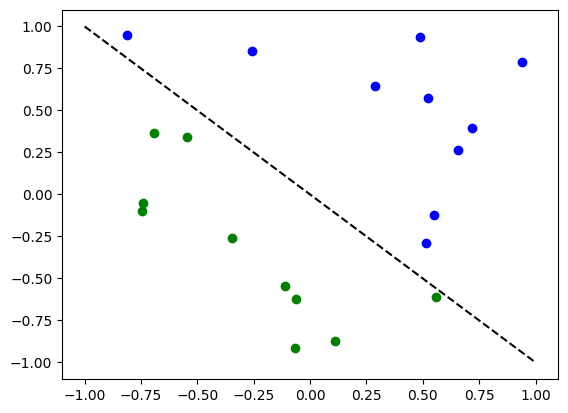

In [31]:
num_inputs = 2
num_samples = 20
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}
y = 2 * y01 - 1  # in {-1, +1}
y_one_hot = np.zeros((num_samples, 2))
for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1

for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

### Classification with an `EstimatorQNN`

First we show how an `EstimatorQNN` can be used for classification within a `NeuralNetworkClassifier`. In this context, the `EstimatorQNN` is expected to return one-dimensional output in $[-1, +1]$. This only works for binary classification and we assign the two classes to $\{-1, +1\}$. To simplify the composition of parameterized quantum circuit from a feature map and an ansatz we can use the `QNNCircuit` class. 

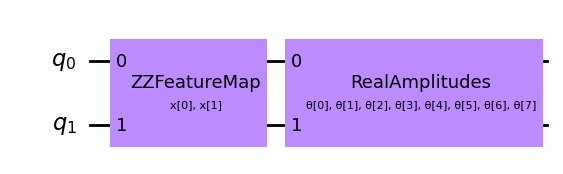

In [32]:
# construct QNN with the QNNCircuit's default ZZFeatureMap feature map and RealAmplitudes ansatz.
qc = QNNCircuit(num_qubits=2)
qc.draw(output="mpl")

Create a quantum neural network

In [33]:
estimator_qnn = EstimatorQNN(circuit=qc)

In [34]:
# QNN maps inputs to [-1, +1]
estimator_qnn.forward(X[0, :], algorithm_globals.random.random(estimator_qnn.num_weights))

array([[0.23521988]])

We will add a callback function called `callback_graph`. This will be called for each iteration of the optimizer and will be passed two parameters: the current weights and the value of the objective function at those weights. For our function, we append the value of the objective function to an array so we can plot iteration versus objective function value and update the graph with each iteration. However, you can do whatever you want with a callback function as long as it gets the two parameters mentioned passed. 

In [35]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [36]:
# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=60), callback=callback_graph
)

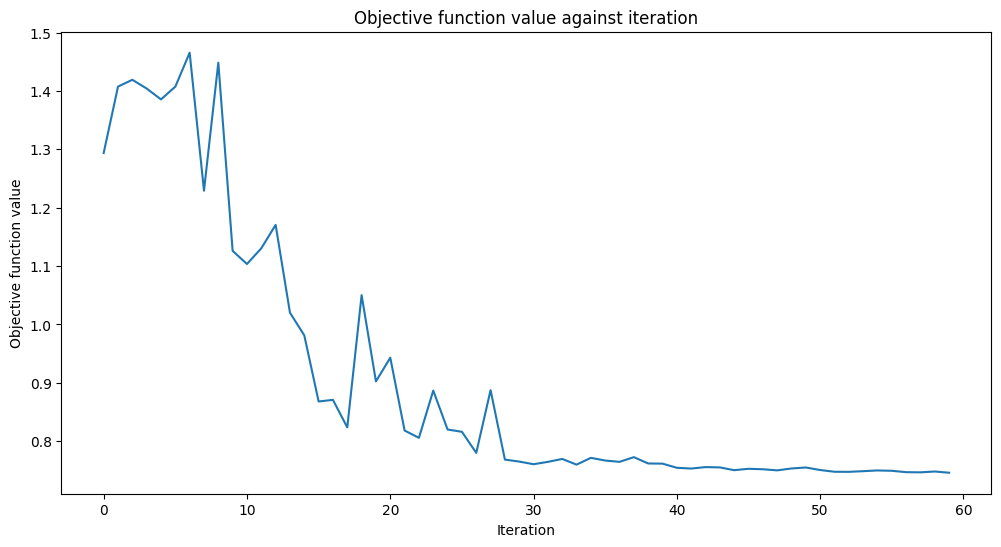

0.8

In [37]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
estimator_classifier.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
estimator_classifier.score(X, y)

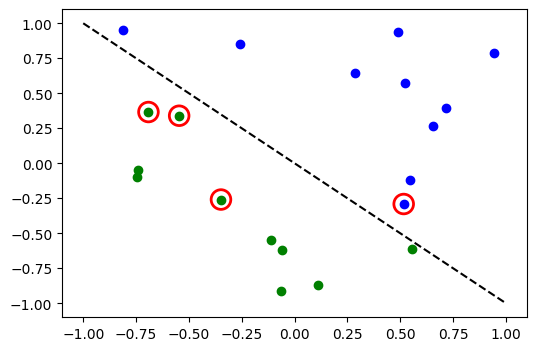

In [38]:
# evaluate data points
y_predict = estimator_classifier.predict(X)

# plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

Now, when the model is trained, we can explore the weights of the neural network. Please note, the number of weights is defined by ansatz.

In [39]:
estimator_classifier.weights

array([ 0.86209107, -1.06526254, -0.10663602, -0.39086371,  1.0894299 ,
        0.59368219,  2.22731471, -1.04769663])

### Do it yourself

There are a number of ways you can play with the above "model" QNN. First start with the `optimizer`.  This interface is based on [SciPy’s optimize module](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.Minimizer.html#qiskit.algorithms.optimizers.Minimizer). Try different optimizers, do you see any difference?  

In [ ]:
# Code me

### Classification with a `SamplerQNN`

Next we show how a `SamplerQNN` can be used for classification within a `NeuralNetworkClassifier`. In this context, the `SamplerQNN` is expected to return $d$-dimensional probability vector as output, where $d$ denotes the number of classes. 
The underlying `Sampler` primitive returns quasi-distributions of bit strings and we just need to define a mapping from the measured bitstrings to the different classes. For binary classification we use the parity mapping. Again we can use the `QNNCircuit` class to set up a parameterized quantum circuit from a feature map and ansatz of our choice.

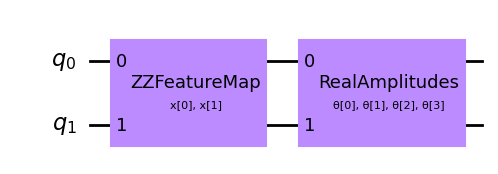

In [40]:
# construct a quantum circuit from the default ZZFeatureMap feature map and a customized RealAmplitudes ansatz
qc = QNNCircuit(ansatz=RealAmplitudes(num_inputs, reps=1))
qc.draw(output="mpl")

In [41]:
# parity maps bitstrings to 0 or 1
def parity(x):
    return "{:b}".format(x).count("1") % 2


output_shape = 2  # corresponds to the number of classes, possible outcomes of the (parity) mapping.

In [42]:
# construct QNN
sampler_qnn = SamplerQNN(
    circuit=qc,
    interpret=parity,
    output_shape=output_shape,
)

In [43]:
# construct classifier
sampler_classifier = NeuralNetworkClassifier(
    neural_network=sampler_qnn, optimizer=COBYLA(maxiter=30), callback=callback_graph
)

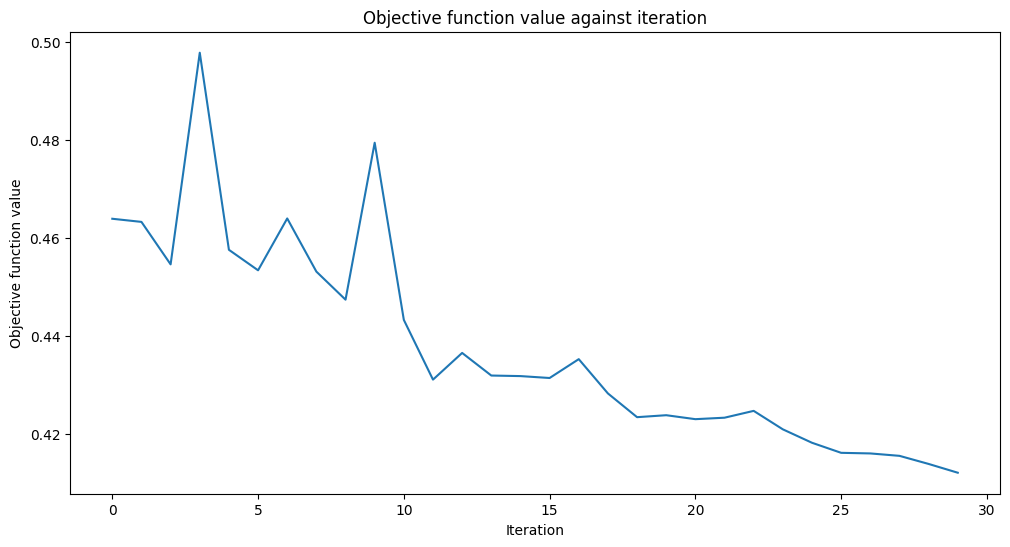

0.7

In [44]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
sampler_classifier.fit(X, y01)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
sampler_classifier.score(X, y01)

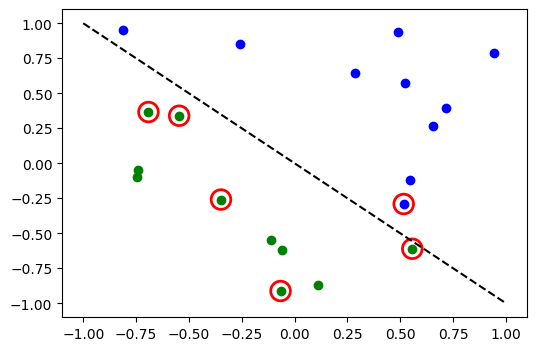

In [45]:
# evaluate data points
y_predict = sampler_classifier.predict(X)

# plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y01, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

Again, once the model is trained we can take a look at the weights. As we set `reps=1` explicitly in our ansatz, we can see less parameters than in the previous model.

In [46]:
sampler_classifier.weights

array([ 1.67198565,  0.46045402, -0.93462862, -0.95266092])

### Variational Quantum Classifier (`VQC`)

The `VQC` is a special variant of the `NeuralNetworkClassifier` with a `SamplerQNN`. It applies a parity mapping (or extensions to multiple classes) to map from the bitstring to the classification, which results in a probability vector, which is interpreted as a one-hot encoded result. By default, it applies this the `CrossEntropyLoss` function that expects labels given in one-hot encoded format and will return predictions in that format too.

In [47]:
# construct feature map, ansatz, and optimizer
feature_map = ZZFeatureMap(num_inputs)
ansatz = RealAmplitudes(num_inputs, reps=1)

# construct variational quantum classifier
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    loss="cross_entropy",
    optimizer=COBYLA(maxiter=30),
    callback=callback_graph,
)

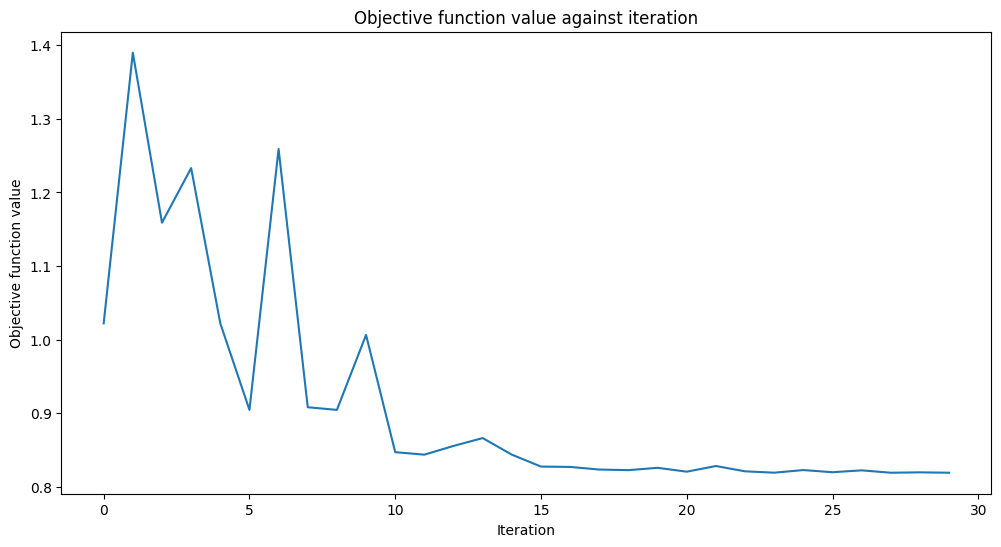

0.75

In [48]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(X, y_one_hot)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(X, y_one_hot)

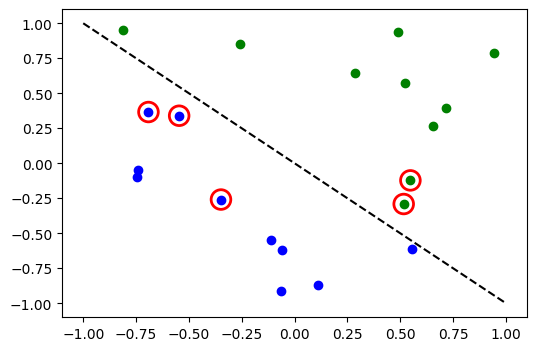

In [49]:
# evaluate data points
y_predict = vqc.predict(X)

# plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y_one_hot, y_predict):
    if y_target[0] == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if not np.all(y_target == y_p):
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

### Multiple classes with VQC
In this section we generate an artificial dataset that contains samples of three classes and show how to train a model to classify this dataset. This example shows how to tackle more interesting problems in machine learning. Of course, for a sake of short training time we prepare a tiny dataset. We employ `make_classification` from SciKit-Learn to generate a dataset. There 10 samples in the dataset, 2 features, that means we can still have a nice plot of the dataset, as well as no redundant features, these are features are generated as a combinations of the other features. Also, we have 3 different classes in the dataset, each classes one kind of centroid and we set class separation to `2.0`, a slight increase from the default value of `1.0` to ease the classification problem.

Once the dataset is generated we scale the features into the range `[0, 1]`.

In [50]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

X, y = make_classification(
    n_samples=10,
    n_features=2,
    n_classes=3,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=algorithm_globals.random_seed,
)
X = MinMaxScaler().fit_transform(X)

Let's see how our dataset looks like.

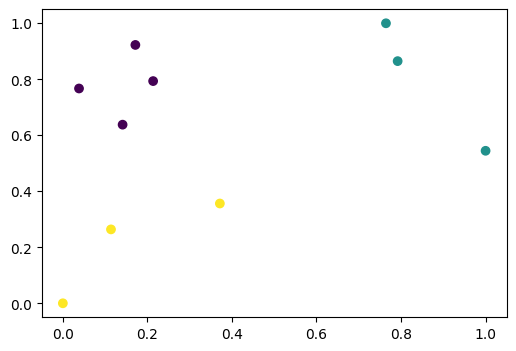

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y)

We also transform labels and make them categorical.

In [52]:
y_cat = np.empty(y.shape, dtype=str)
y_cat[y == 0] = "A"
y_cat[y == 1] = "B"
y_cat[y == 2] = "C"
print(y_cat)

['A' 'A' 'B' 'C' 'C' 'A' 'B' 'B' 'A' 'C']


We create an instance of `VQC` similar to the previous example, but in this case we pass a minimal set of parameters. Instead of feature map and ansatz we pass just the number of qubits that is equal to the number of features in the dataset, an optimizer with a low number of iteration to reduce training time, a quantum instance, and a callback to observe progress.

In [53]:
vqc = VQC(
    num_qubits=2,
    optimizer=COBYLA(maxiter=30),
    callback=callback_graph,
)

Start the training process in the same way as in previous examples.

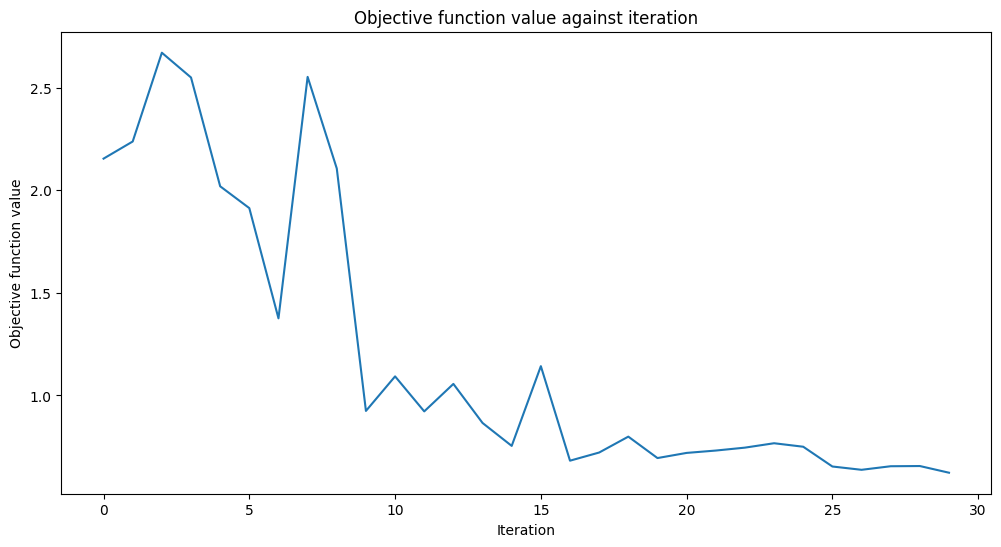

0.9

In [54]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(X, y_cat)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(X, y_cat)

Despite we had the low number of iterations, we achieved quite a good score. Let see the output of the `predict` method and compare the output with the ground truth.

In [55]:
predict = vqc.predict(X)
print(f"Predicted labels: {predict}")
print(f"Ground truth:     {y_cat}")

Predicted labels: ['A' 'A' 'B' 'C' 'C' 'A' 'B' 'B' 'A' 'B']
Ground truth:     ['A' 'A' 'B' 'C' 'C' 'A' 'B' 'B' 'A' 'C']


## Regression

We prepare a simple regression dataset to illustrate the following algorithms.

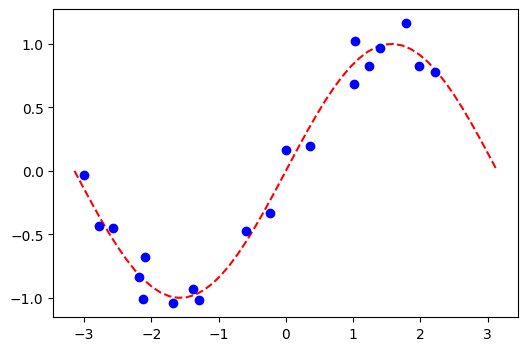

In [56]:
num_samples = 20
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
f = lambda x: np.sin(x)

X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y = f(X[:, 0]) + eps * (2 * algorithm_globals.random.random(num_samples) - 1)

plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
plt.show()

### Regression with an `EstimatorQNN`

Here we restrict to regression with an `EstimatorQNN` that returns values in $[-1, +1]$. More complex and also multi-dimensional models could be constructed, also based on `SamplerQNN` but that exceeds the scope of this tutorial.

In [57]:
# construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

# construct a circuit
qc = QNNCircuit(feature_map=feature_map, ansatz=ansatz)

# construct QNN
regression_estimator_qnn = EstimatorQNN(circuit=qc)

In [58]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=5),
    callback=callback_graph,
)

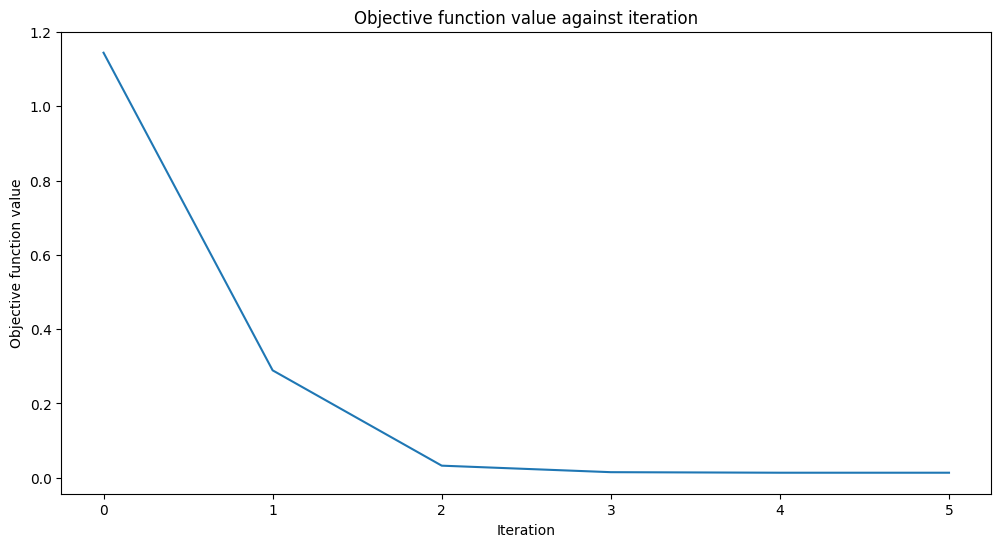

0.9769994291935522

In [59]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(X, y)

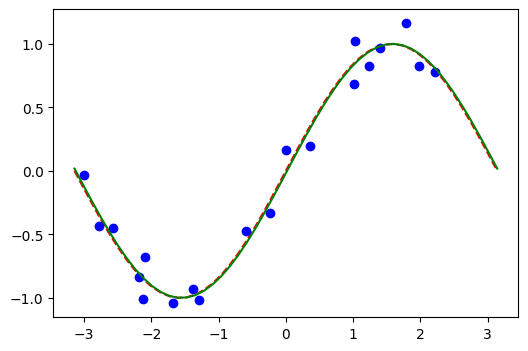

In [60]:
# plot target function
plt.plot(X_, f(X_), "r--")

# plot data
plt.plot(X, y, "bo")

# plot fitted line
y_ = regressor.predict(X_)
plt.plot(X_, y_, "g-")
plt.show()

Similarly to the classification models, we can obtain an array of trained weights by querying a corresponding property of the model. In this model we have only one parameter defined as `param_y` above.

In [61]:
regressor.weights

array([-1.58870599])

### Regression with the Variational Quantum Regressor (`VQR`)

Similar to the `VQC` for classification, the `VQR` is a special variant of the `NeuralNetworkRegressor` with a `EstimatorQNN`. By default it considers the `L2Loss` function to minimize the mean squared error between predictions and targets.

In [62]:
vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=5),
    callback=callback_graph,
)

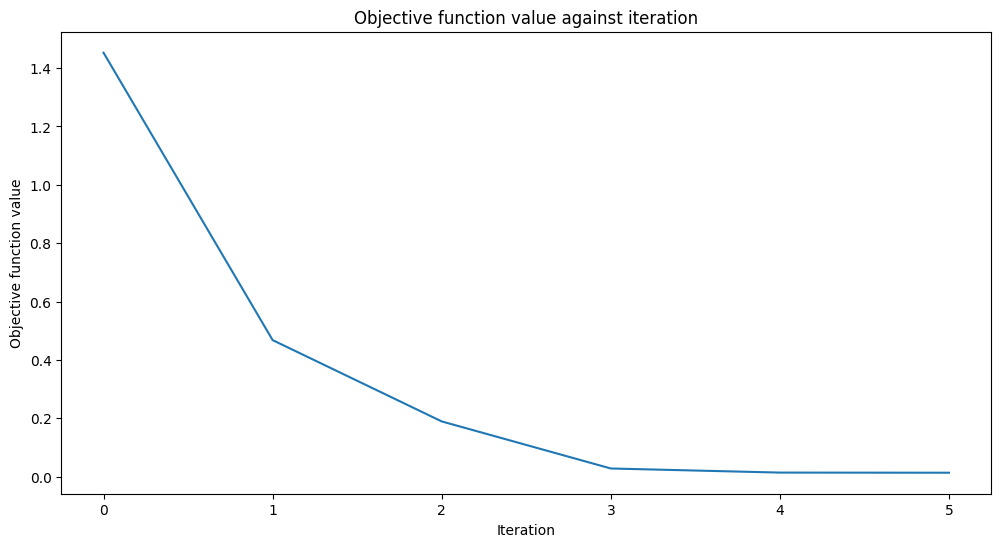

0.9769955693935384

In [63]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit regressor
vqr.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score result
vqr.score(X, y)

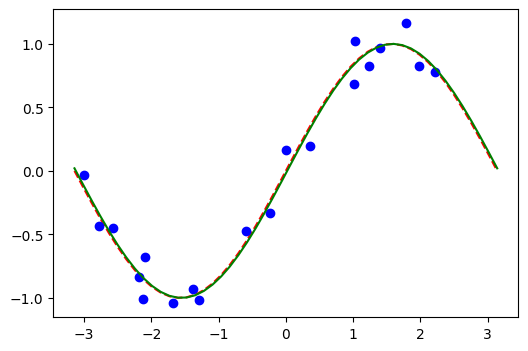

In [64]:
# plot target function
plt.plot(X_, f(X_), "r--")

# plot data
plt.plot(X, y, "bo")

# plot fitted line
y_ = vqr.predict(X_)
plt.plot(X_, y_, "g-")
plt.show()